#Car purchase prediction




In [266]:
import numpy as np
import pandas as pd

In [267]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [268]:
df.shape

(1000, 5)

In [269]:
df.Purchased.value_counts()


0    598
1    402
Name: Purchased, dtype: int64

In [270]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [271]:
df = df.drop(columns = ['User ID'],axis = 1)

In [272]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


<Axes: >

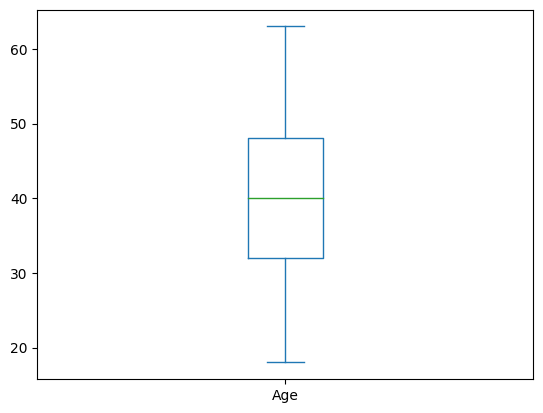

In [273]:
df['Age'].plot.box()

<Axes: >

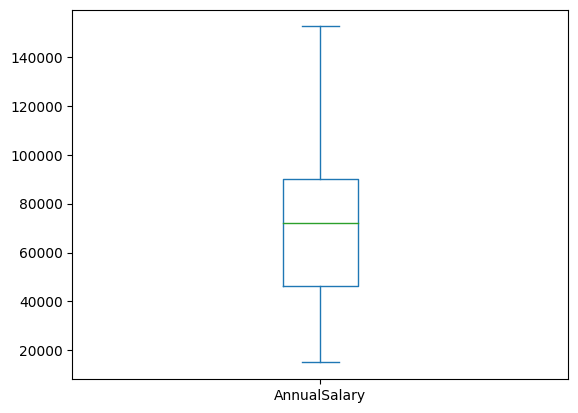

In [274]:
df['AnnualSalary'].plot.box()

<Axes: xlabel='Age', ylabel='AnnualSalary'>

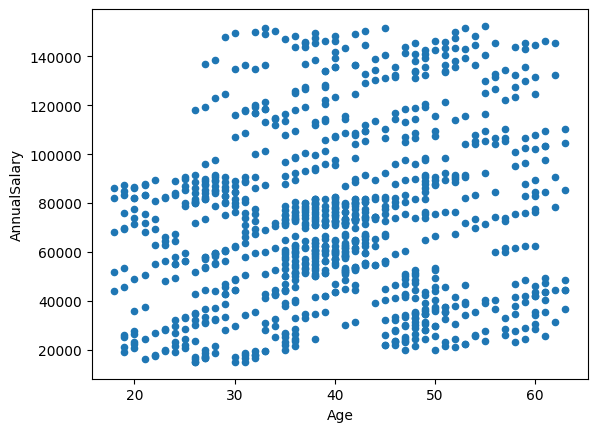

In [275]:
df.plot.scatter(x='Age', y='AnnualSalary')

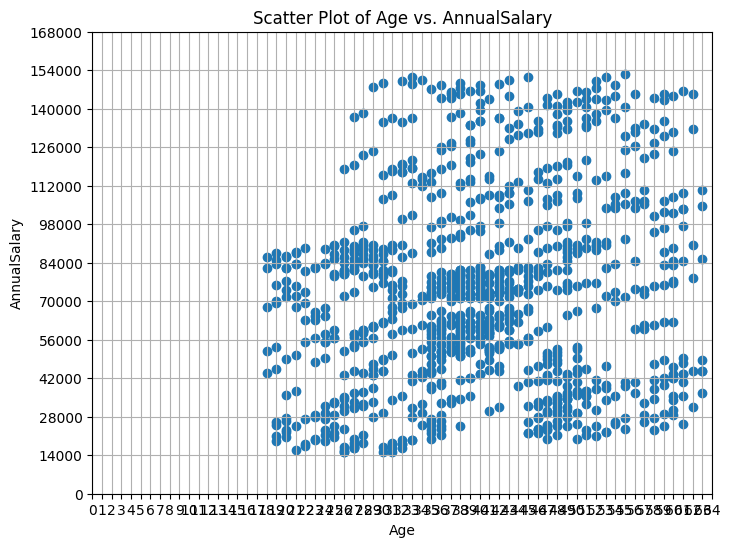

In [276]:
# Calculate the minimum and maximum values for Age and AnnualSalary
min_age = df['Age'].min()
max_age = df['Age'].max()
min_salary = df['AnnualSalary'].min()
max_salary = df['AnnualSalary'].max()

# Define the x-axis limits and ticks
x_axis_start = 0
x_axis_increment = 1

# Calculate the upper limit for the x-axis based on the data
x_axis_end = max_age + x_axis_increment

# Define the y-axis limits and ticks
y_axis_start = 0
y_axis_increment = 14000
y_axis_end = max_salary + y_axis_increment

# Create a scatter plot with custom axis limits and ticks
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['AnnualSalary'])

# Set the limits for the x and y axes based on the starting values
plt.xlim(x_axis_start, x_axis_end)
plt.ylim(y_axis_start, y_axis_end)

# Define the x-axis ticks
x_ticks = range(x_axis_start, x_axis_end + x_axis_increment, x_axis_increment)

# Define the y-axis ticks
y_ticks = range(y_axis_start, y_axis_end + y_axis_increment, y_axis_increment)

# Set the x-axis and y-axis ticks
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# Label the axes
plt.xlabel('Age')
plt.ylabel('AnnualSalary')
plt.grid(True)
plt.title("Scatter Plot of Age vs. AnnualSalary")
plt.show()

In [277]:
# 18 to 63 age
# 14000> salary

In [278]:
# Calculate the interquartile range (IQR)
Q1 = df['AnnualSalary'].quantile(0.25)
Q3 = df['AnnualSalary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count the outliers
outliers = df[(df['AnnualSalary'] < lower_bound) | (df['AnnualSalary'] > upper_bound)]
num_outliers = len(outliers)

print("Number of outliers in AnnualSalary:", num_outliers)

Number of outliers in AnnualSalary: 0


In [279]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [280]:
df.Gender = le.fit_transform(df.Gender)

In [281]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

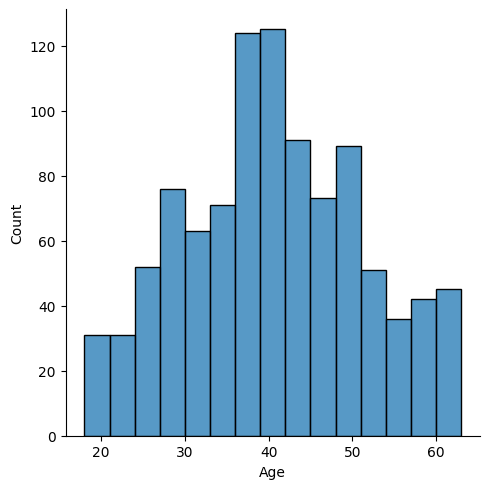

In [283]:
sns.displot(df.Age)

In [284]:
df.describe()

,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.484000,40.106000,72689.000000,0.402000
std,0.499994,10.707073,34488.341867,0.490547
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,32.000000,46375.000000,0.000000
50%,0.000000,40.000000,72000.000000,0.000000
75%,1.000000,48.000000,90000.000000,1.000000
max,1.000000,63.000000,152500.000000,1.000000


<Axes: >

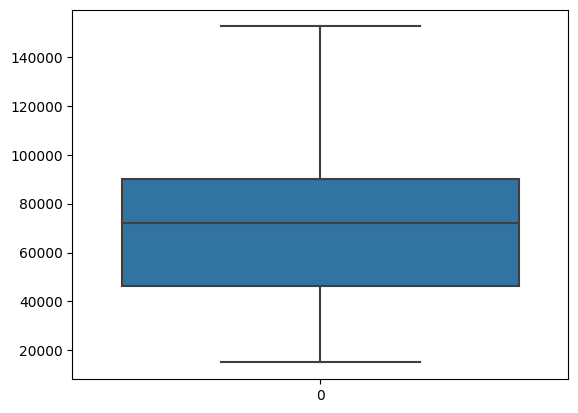

In [285]:
sns.boxplot(df.AnnualSalary)

<Axes: >

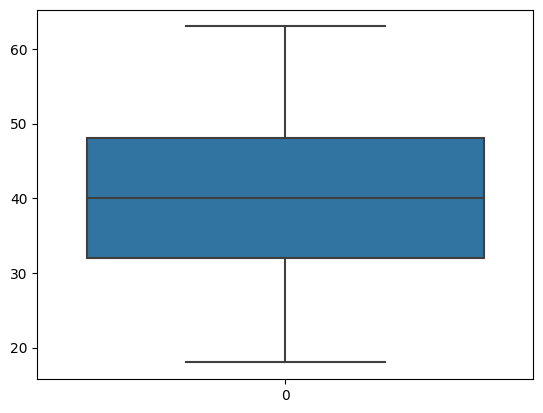

In [286]:
sns.boxplot(df.Age)

In [287]:
df.corr()

,Gender,Age,AnnualSalary,Purchased
Gender,1.000000,-0.084760,-0.063301,-0.047211
Age,-0.084760,1.000000,0.166042,0.616036
AnnualSalary,-0.063301,0.166042,1.000000,0.364974
Purchased,-0.047211,0.616036,0.364974,1.000000


<Axes: >

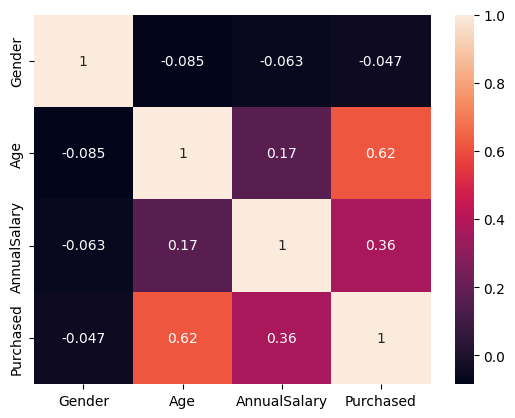

In [288]:
sns.heatmap(df.corr(),annot =True)

In [289]:
df.corr().Purchased.sort_values(ascending=False)

Purchased       1.000000
Age             0.616036
AnnualSalary    0.364974
Gender         -0.047211
Name: Purchased, dtype: float64

In [294]:
df.dtypes

Gender          int64
Age             int64
AnnualSalary    int64
Purchased       int64
dtype: object

In [295]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [296]:
## X and y split

X =df.drop(columns =['Purchased'],axis =1)

In [297]:
X.head()

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000


In [298]:
y =df.Purchased
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

In [299]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [300]:
 scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
 scaled_x.head()

,Gender,Age,AnnualSalary
0,1.0,0.377778,0.036364
1,1.0,0.488889,0.207273
2,1.0,0.688889,0.429091
3,1.0,0.488889,0.672727
4,1.0,0.155556,0.465455


In [301]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 0)

In [302]:
x_train.shape

(800, 3)

In [303]:
x_test.shape

(200, 3)

#Logistic Regression

In [304]:
## Model building

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [305]:
model.fit(x_train,y_train)

LogisticRegression()

In [306]:
pred = model.predict(x_test)

In [307]:
pred

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0])

In [308]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [309]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
print('Testing accuracy = ',accuracy_score(y_test,pred))


Testing accuracy =  0.86


In [310]:
model.predict([[1,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

#Random Forest classifier


In [311]:
from sklearn.ensemble import RandomForestClassifier

In [312]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [333]:
model1=RandomForestClassifier(criterion='entropy')
model1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [334]:
y_predict_1=model1.predict(x_test)
y_predict_train=model1.predict(x_train)

In [335]:
y_predict_1

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [336]:
print('Testing accuracy = ',accuracy_score(y_test,y_predict_1))


Testing accuracy =  0.91


In [317]:
model1.predict([[0,35,75000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# Decision Tree



In [337]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
model2=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [339]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [340]:
y_predict_2=model2.predict(x_test)

In [341]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [342]:
y_predict_2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0])

In [343]:
y_predict_train=model2.predict(x_train)

In [344]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Testing Accuracy = ', accuracy_score(y_test,y_predict_2))


Testing Accuracy =  0.925


In [325]:
model2.predict([[0,19,30000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Kernel SVM


In [326]:
from sklearn.svm import SVC

# Create an SVM model with a linear kernel
model3 = SVC(kernel='linear')

# Fit the model on the training data
model3.fit(x_train, y_train)



SVC(kernel='linear')

In [327]:
y_test

993    0
859    0
298    1
553    0
672    0
      ..
679    0
722    1
215    0
653    0
150    0
Name: Purchased, Length: 200, dtype: int64

In [328]:
# Make predictions on the test data
y_predict_3 = model3.predict(x_test)


In [329]:

# Make predictions on the training data (if needed)
y_predict_train = model3.predict(x_train)

In [330]:
model3.predict([[0,19,30000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [331]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve
print('Testing accuracy = ',accuracy_score(y_test,y_predict_3))


Testing accuracy =  0.865


#Import pickle


In [347]:
import pickle


In [348]:
pickle.dump(model3,open('car_.pkl','wb'))